In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv("data/dataset_50_tic-tac-toe.arff.csv")
df.head()


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [5]:
df.info()
df["Class"].value_counts()
for col in df.columns[:-1]:
    print(col, df[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   top-left-square       958 non-null    object
 1   top-middle-square     958 non-null    object
 2   top-right-square      958 non-null    object
 3   middle-left-square    958 non-null    object
 4   middle-middle-square  958 non-null    object
 5   middle-right-square   958 non-null    object
 6   bottom-left-square    958 non-null    object
 7   bottom-middle-square  958 non-null    object
 8   bottom-right-square   958 non-null    object
 9   Class                 958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB
top-left-square top-left-square
x    418
o    335
b    205
Name: count, dtype: int64
top-middle-square top-middle-square
x    378
o    330
b    250
Name: count, dtype: int64
top-right-square top-right-square
x    418
o    335
b    205
Name: count, dtype

In [6]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
categorical_features = X.columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ]
)

clf = DecisionTreeClassifier(random_state=42)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", clf)
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['top-left-square',
                                                   'top-middle-square',
                                                   'top-right-square',
                                                   'middle-left-square',
                                                   'middle-middle-square',
                                                   'middle-right-square',
                                                   'bottom-left-square',
                                                   'bottom-middle-square',
                                                   'bottom-right-square'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm


Accuracy: 0.9166666666666666

Classification report:
               precision    recall  f1-score   support

    negative       0.90      0.85      0.88        67
    positive       0.92      0.95      0.94       125

    accuracy                           0.92       192
   macro avg       0.91      0.90      0.91       192
weighted avg       0.92      0.92      0.92       192



array([[ 57,  10],
       [  6, 119]])

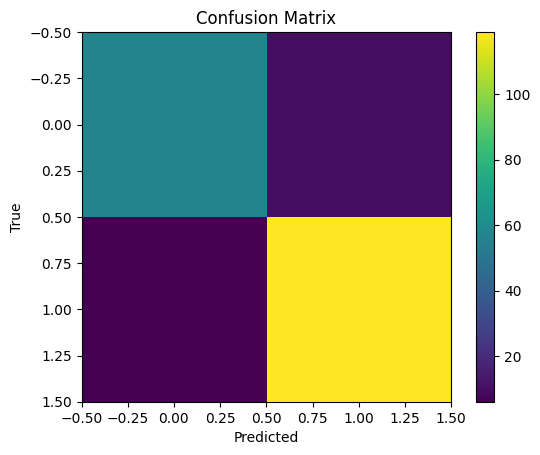

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.colorbar(im)
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest accuracy: 0.9635416666666666


In [12]:
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])


In [13]:
from sklearn.model_selection import GridSearchCV


In [14]:
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 5, 10, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"]
}


In [15]:
grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=5,              # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1,         # use all CPU cores if possible
    verbose=2          # print progress
)


In [16]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['top-left-square',
                                                                          'top-middle-square',
                                                                          'top-right-square',
                                                                          'middle-left-square',
                                                                          'middle-middle-square',
                                                                          'middle-right-square',
                                                                          'bottom-left-square',
                                                                          'bottom-middle-square',
                                                                          'bottom-right-square'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [17]:
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best CV accuracy: 0.97519735166794


In [18]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm


Test accuracy: 0.9739583333333334

Classification report:
               precision    recall  f1-score   support

    negative       1.00      0.93      0.96        67
    positive       0.96      1.00      0.98       125

    accuracy                           0.97       192
   macro avg       0.98      0.96      0.97       192
weighted avg       0.97      0.97      0.97       192



array([[ 62,   5],
       [  0, 125]])

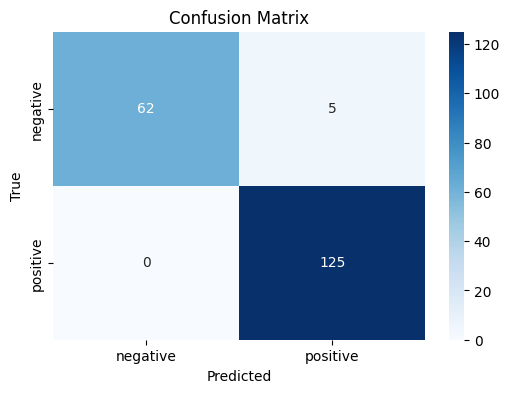

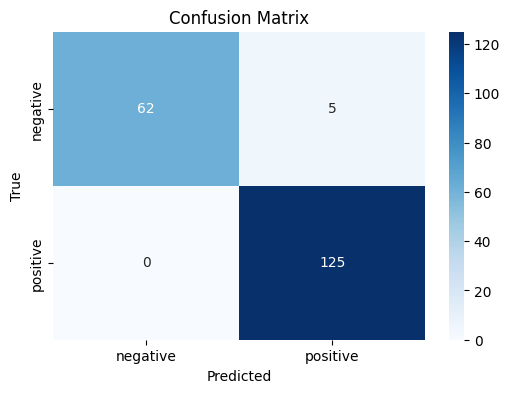

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


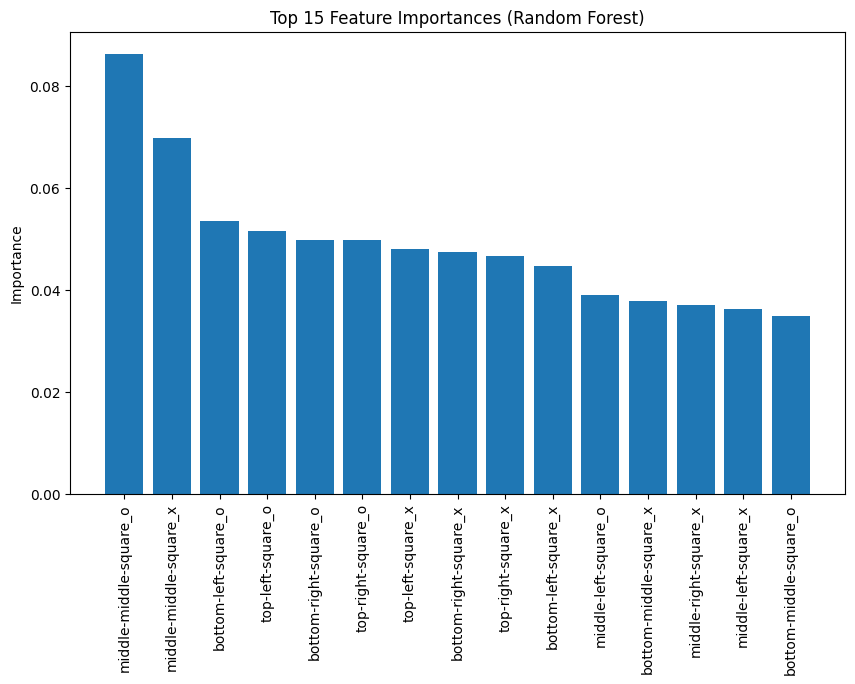

In [20]:
import numpy as np

# Extract trained components
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
rf = best_model.named_steps["classifier"]

# Get one-hot-encoded feature names
feature_names = ohe.get_feature_names_out()

# Match feature importances to names
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top features
plt.figure(figsize=(10,6))
plt.bar(range(15), importances[indices][:15])
plt.xticks(range(15), feature_names[indices][:15], rotation=90)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()


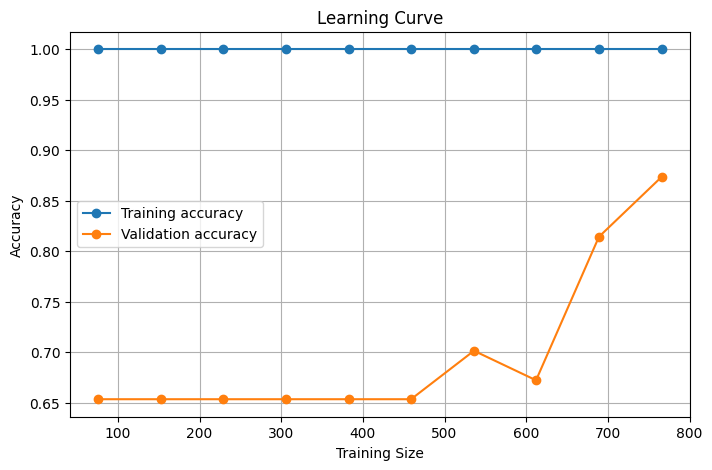

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X,
    y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, marker='o', label="Training accuracy")
plt.plot(train_sizes, test_mean, marker='o', label="Validation accuracy")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


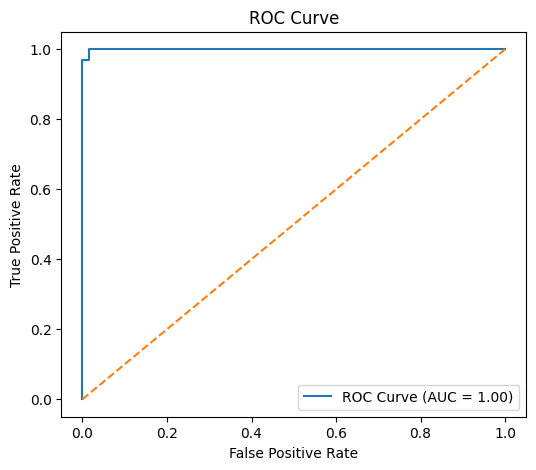

In [22]:
from sklearn.metrics import roc_curve, auc

y_prob = best_model.predict_proba(X_test)[:, 1]  # positive class probability

fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="positive")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [23]:
import joblib

# best_model from grid_search.best_estimator_
joblib.dump(best_model, "model/tic_tac_toe_rf.pkl")
print("Model saved!")


Model saved!
